Problem Statement
Demand forecasts are fundamental to plan and deliver products
and services. Accurate forecasting of demand can help the
manufacturers to maintain appropriate stock which results in
reduction in loss due to product not being sold and also
reduces the opportunity cost (i.e. higher demand but less
availability => opportunity lost). Despite such relevance,
manufacturers have difficulty choosing which forecast model is
the best for their use case. In this project, historical sales data
corresponding to multiple(25) items sold in 10 stores are
provided and participants are expected to come up with a best
model to predict the future demand for products which results in
maximum profit for the manufacturer.

Predict the demand for
the next 3 months at the item level (i.e. all the stores
combined). 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import linear_model
from matplotlib.pyplot import figure

In [2]:
df= pd.read_csv('DF.csv')
df
     

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
57962,2016-09-18,2,4,51
57963,2016-09-19,2,4,23
57964,2016-09-20,2,4,32
57965,2016-09-21,2,4,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57967 entries, 0 to 57966
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    57967 non-null  object
 1   store   57967 non-null  int64 
 2   item    57967 non-null  int64 
 3   sales   57967 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ MB


In [4]:
df['date']=pd.to_datetime(df['date'], errors='ignore')

In [5]:
df['date']

0       2013-01-01
1       2013-01-02
2       2013-01-03
3       2013-01-04
4       2013-01-05
           ...    
57962   2016-09-18
57963   2016-09-19
57964   2016-09-20
57965   2016-09-21
57966   2016-09-22
Name: date, Length: 57967, dtype: datetime64[ns]

In [6]:
df['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [7]:
df['store'].nunique()

10

In [8]:
df.groupby(["store"]).agg({"sales": ["count","sum", "mean", "median", "std", "min", "max"]})

sales                                              
      count     sum       mean median        std min  max
store                                                    
1      7304  230596  31.571194   27.0  16.984101   4  115
2      6839  311789  45.589852   39.0  24.056275   3  150
3      5478  244037  44.548558   40.0  21.817736   4  131
4      5478  224967  41.067360   37.0  20.324751   4  133
5      5478  162630  29.687842   27.0  14.814144   3   87
6      5478  162629  29.687660   27.0  14.738885   2   91
7      5478  148652  27.136181   24.0  13.704519   1   80
8      5478  262426  47.905440   43.0  23.307829   7  145
9      5478  225791  41.217780   37.0  20.224923   4  126
10     5478  239966  43.805403   40.0  21.362374   4  120

In [9]:
df.item.unique()
     

array([1, 2, 3, 4])

In [10]:
df.item.nunique()

4

In [11]:
df.groupby(["item"]).agg({"sales": ["count","sum", "mean", "median", "std", "min", "max"]})

sales                                               
      count      sum       mean median        std min  max
item                                                      
1     18260   401384  21.981599   21.0   8.468922   1   59
2     18260  1069564  58.574151   56.0  20.093015   9  150
3     18260   669087  36.642223   35.0  13.179441   7  104
4      3187    73448  23.046125   22.0   8.307157   3   66

In [12]:
df.describe()


,store,item,sales
count,57967.000000,57967.000000,57967.000000
mean,5.276071,2.109959,38.185226
std,2.944814,0.915344,20.863484
min,1.000000,1.000000,1.000000
25%,3.000000,1.000000,22.000000
50%,5.000000,2.000000,33.000000
75%,8.000000,3.000000,50.000000
max,10.000000,4.000000,150.000000


In [13]:
iqr = df.store.quantile(0.75) - df.store.quantile(0.25)
iqr
upper_threshold = df.store.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = df.store.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
upper_threshold,lower_threshold

(15.5, -4.5)

In [14]:
#plt.subplot(1, 2, 2)
fig = px.box(df["store"])
fig.show()

In [15]:
iqr = df.item.quantile(0.75) - df.item.quantile(0.25)
iqr
upper_threshold = df.item.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = df.item.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
upper_threshold,lower_threshold

(6.0, -2.0)

In [16]:
#plt.subplot(1, 2, 2)
fig = px.box(df["item"])
fig.show()

In [17]:
iqr = df.sales.quantile(0.75) - df.sales.quantile(0.25)
iqr
upper_threshold = df.sales.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = df.sales.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
upper_threshold,lower_threshold
     

(92.0, -20.0)

In [18]:
#ply.boxplot(df['sales'])
#plt.show()

fig = px.box(df["sales"])
fig.show()

In [19]:

df.sales = df.sales.clip(upper_threshold,lower_threshold)
df.sales
fig = px.box(df["sales"])
fig.show()

In [20]:
df.describe()

,store,item,sales
count,57967.000000,57967.000000,57967.000000
mean,5.276071,2.109959,37.972398
std,2.944814,0.915344,20.207772
min,1.000000,1.000000,1.000000
25%,3.000000,1.000000,22.000000
50%,5.000000,2.000000,33.000000
75%,8.000000,3.000000,50.000000
max,10.000000,4.000000,92.000000


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



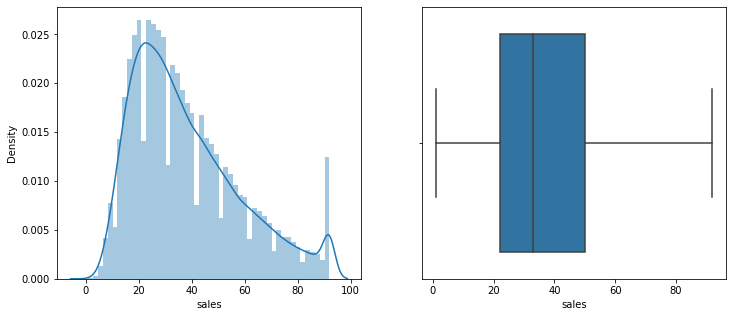

In [21]:

plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['sales'])
  
plt.subplot(1, 2, 2)
sns.boxplot(df['sales'])
plt.show()
     

In [22]:
df

,date,store,item,sales
0,2013-01-01,1,1,13.0
1,2013-01-02,1,1,11.0
2,2013-01-03,1,1,14.0
3,2013-01-04,1,1,13.0
4,2013-01-05,1,1,10.0
...,...,...,...,...
57962,2016-09-18,2,4,51.0
57963,2016-09-19,2,4,23.0
57964,2016-09-20,2,4,32.0
57965,2016-09-21,2,4,20.0


JAR

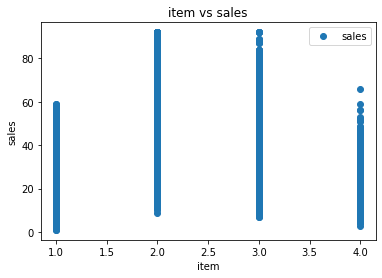

In [23]:
df.plot(x='item', y='sales', style='o')
plt.title('item vs sales')
plt.xlabel('item')
plt.ylabel('sales')
plt.show()

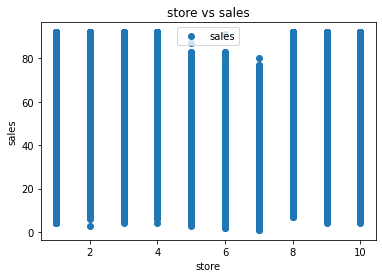

In [24]:
df.plot(x='store', y='sales', style='o')
plt.title('store vs sales')
plt.xlabel('store')
plt.ylabel('sales')
plt.show()

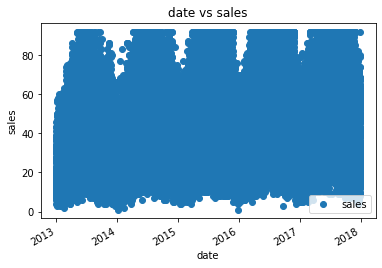

In [25]:
df.plot(x='date', y='sales', style='o')
plt.title('date vs sales')
plt.xlabel('date')
plt.ylabel('sales')
plt.show()

In [26]:
sales_by_item = df.groupby('item')['sales'].sum().reset_index()
sales_by_item

,item,sales
0,1,401384.0
1,2,1057249.0
2,3,669065.0
3,4,73448.0


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='item', ylabel='sales'>

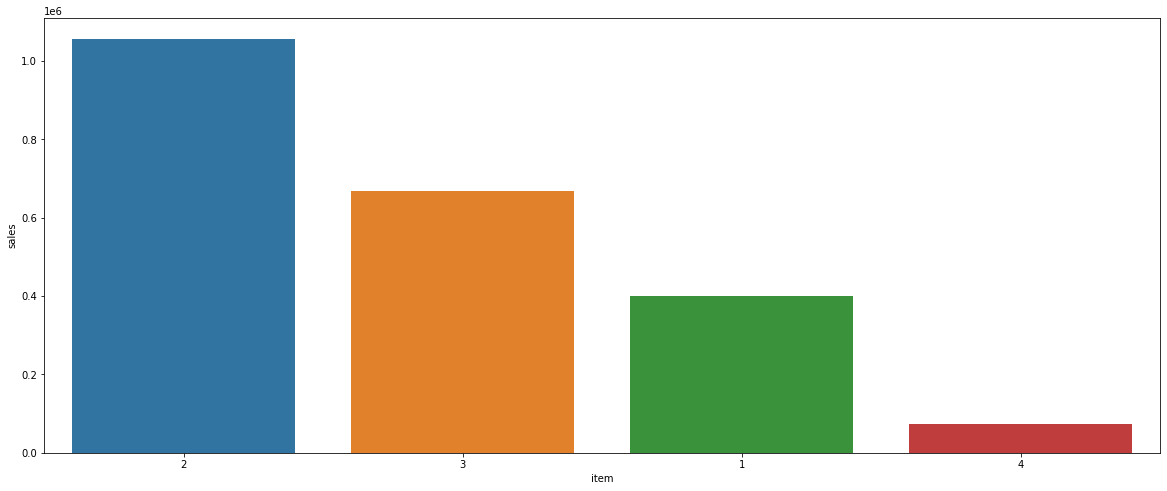

In [27]:
#sales_by_item = df.groupby('item')['sales'].sum().reset_index()
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(sales_by_item.item, sales_by_item.sales, order=sales_by_item.sort_values('sales', ascending = False).item)
    
#ax.set(xlabel = "Item Id", ylabel = "Sum of Sales", title = "Total Sales Per Item")
#plt.xticks(fontsize=12, rotation=90)

In [28]:
sales_by_store = df.groupby('store')['sales'].sum().reset_index()
sales_by_store 

,store,sales
0,1,230467.0
1,2,306917.0
2,3,242350.0
3,4,224380.0
4,5,162630.0
5,6,162629.0
6,7,148652.0
7,8,259120.0
8,9,225132.0
9,10,238869.0


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='store', ylabel='sales'>

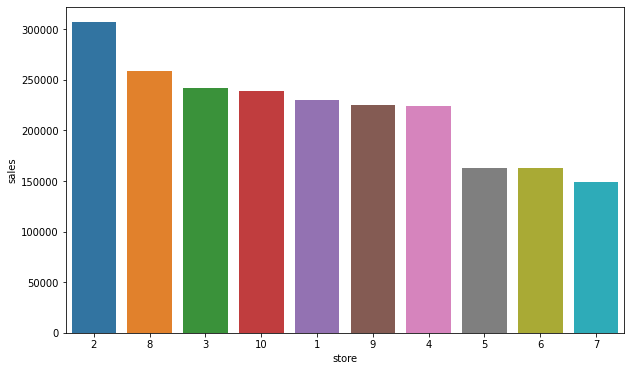

In [29]:

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(sales_by_store.store, sales_by_store.sales, order=sales_by_store.sort_values('sales',ascending = False).store)
    
#ax.set(xlabel = "Store Id", ylabel = "Sum of Sales", title = "Total Sales Per Store")
#plt.xticks(fontsize=12, rotation=45)

Text(0, 0.5, 'Sales/store')

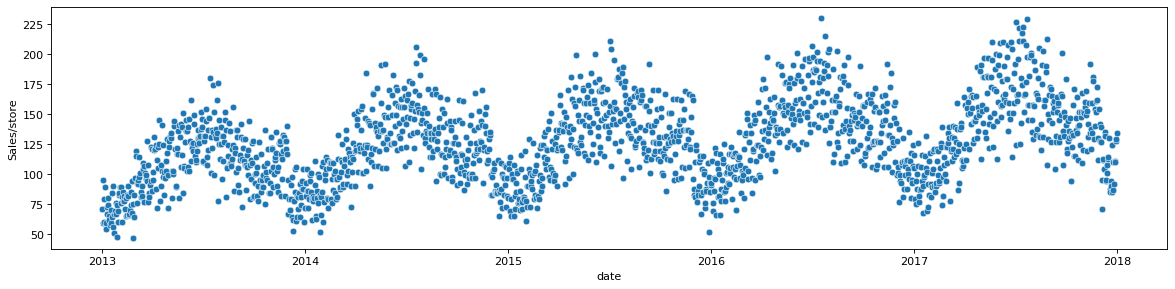

In [30]:

figure(figsize=(18, 4), dpi=80)
item_daily = df.groupby(["date","store"],as_index=False).agg({"sales":"sum"})

item_daily['date'] = pd.to_datetime(item_daily.date, format='%Y/%m/%d')
item_1 = item_daily[item_daily['store']==1]
ax_2 = sns.scatterplot(data=item_1,x='date',y='sales')
ax_2.set_ylabel("Sales/store")

Text(0, 0.5, 'Sales/Item_1')

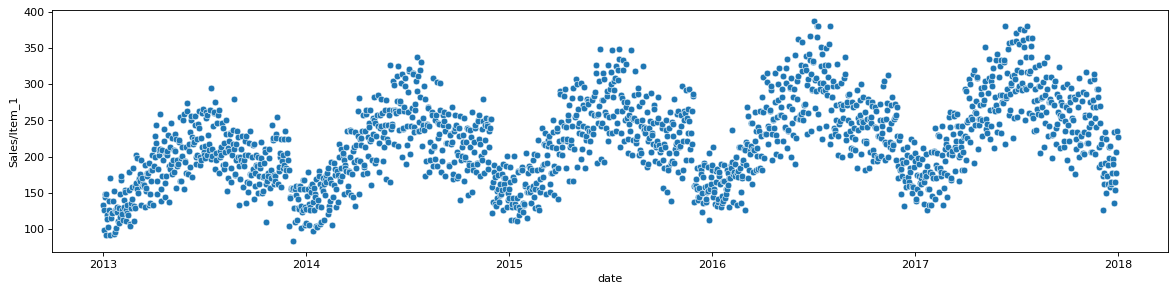

In [31]:

figure(figsize=(18, 4), dpi=80)
item_daily = df.groupby(["date","item"],as_index=False).agg({"sales":"sum"})

item_daily['date'] = pd.to_datetime(item_daily.date, format='%Y/%m/%d')
item_1 = item_daily[item_daily['item']==1]
ax_2 = sns.scatterplot(data=item_1,x='date',y='sales')
ax_2.set_ylabel("Sales/Item_1")
     

Feature Engineering

In [32]:
# Convert the date column to a datetime object
df['date'] = pd.to_datetime(df['date'],  errors='coerce')

In [33]:
# Create new columns for year, month, and day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [34]:
import pandas as pd
from datetime import datetime
import calendar

# Create a sample dataframe
#df = pd.DataFrame({'year': [2022, 2022, 2022, 2022, 2022],
                   #'month': [1, 1, 1, 1, 1],
                   #'day': [1, 2, 3, 4, 5]})

# Define the weekend_or_weekday function
def weekend_or_weekday(year,month,day):
    d = datetime(year,month,day)
    if d.weekday()>4:
        return 1
    else:
        return 0

# Apply the weekend_or_weekday function to each row of the 'year', 'month', and 'day' columns and create a new column called 'weekend'
df['weekend'] = df.apply(lambda x: weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)

# Print the dataframe with the 'weekend' column
print(df)


            date  store  item  sales  year  month  day  weekend
0     2013-01-01      1     1   13.0  2013      1    1        0
1     2013-01-02      1     1   11.0  2013      1    2        0
2     2013-01-03      1     1   14.0  2013      1    3        0
3     2013-01-04      1     1   13.0  2013      1    4        0
4     2013-01-05      1     1   10.0  2013      1    5        1
...          ...    ...   ...    ...   ...    ...  ...      ...
57962 2016-09-18      2     4   51.0  2016      9   18        1
57963 2016-09-19      2     4   23.0  2016      9   19        0
57964 2016-09-20      2     4   32.0  2016      9   20        0
57965 2016-09-21      2     4   20.0  2016      9   21        0
57966 2016-09-22      2     4    3.0  2016      9   22        0

[57967 rows x 8 columns]


In [35]:
import pandas as pd
from datetime import date
import holidays

# Create a sample dataframe
#df = pd.DataFrame({'date': [date(2022, 1, 1), date(2022, 1, 2), date(2022, 1, 3), date(2022, 1, 4), date(2022, 1, 5)]})

# Define the is_holiday function
def is_holiday(x):
    india_holidays = holidays.country_holidays('IN')
    if india_holidays.get(x):
        return 1
    else:
        return 0

# Apply the is_holiday function to each row of the 'date' column and create a new column called 'holidays'
df['holidays'] = df['date'].apply(is_holiday)

# Print the dataframe with the 'holidays' column
print(df)


            date  store  item  sales  year  month  day  weekend  holidays
0     2013-01-01      1     1   13.0  2013      1    1        0         0
1     2013-01-02      1     1   11.0  2013      1    2        0         0
2     2013-01-03      1     1   14.0  2013      1    3        0         0
3     2013-01-04      1     1   13.0  2013      1    4        0         0
4     2013-01-05      1     1   10.0  2013      1    5        1         0
...          ...    ...   ...    ...   ...    ...  ...      ...       ...
57962 2016-09-18      2     4   51.0  2016      9   18        1         0
57963 2016-09-19      2     4   23.0  2016      9   19        0         0
57964 2016-09-20      2     4   32.0  2016      9   20        0         0
57965 2016-09-21      2     4   20.0  2016      9   21        0         0
57966 2016-09-22      2     4    3.0  2016      9   22        0         0

[57967 rows x 9 columns]


In [36]:
from datetime import datetime

# Create a sample dataframe
#df = pd.DataFrame({'year': [2022, 2022, 2022, 2022, 2022],
                   #'month': [1, 1, 1, 1, 1],
                   #'day': [1, 2, 3, 4, 5]})

# Define the which_day function
def which_day(year, month, day):
    d = datetime(year, month, day)
    return d.weekday()

# Apply the which_day function to each row of the 'year', 'month', and 'day' columns and create a new column called 'weekday'
df['weekday'] = df.apply(lambda x: which_day(x['year'], x['month'], x['day']), axis=1)

# Print the dataframe with the 'weekday' column
print(df)


            date  store  item  sales  year  month  day  weekend  holidays  \
0     2013-01-01      1     1   13.0  2013      1    1        0         0   
1     2013-01-02      1     1   11.0  2013      1    2        0         0   
2     2013-01-03      1     1   14.0  2013      1    3        0         0   
3     2013-01-04      1     1   13.0  2013      1    4        0         0   
4     2013-01-05      1     1   10.0  2013      1    5        1         0   
...          ...    ...   ...    ...   ...    ...  ...      ...       ...   
57962 2016-09-18      2     4   51.0  2016      9   18        1         0   
57963 2016-09-19      2     4   23.0  2016      9   19        0         0   
57964 2016-09-20      2     4   32.0  2016      9   20        0         0   
57965 2016-09-21      2     4   20.0  2016      9   21        0         0   
57966 2016-09-22      2     4    3.0  2016      9   22        0         0   

       weekday  
0            1  
1            2  
2            3  
3      

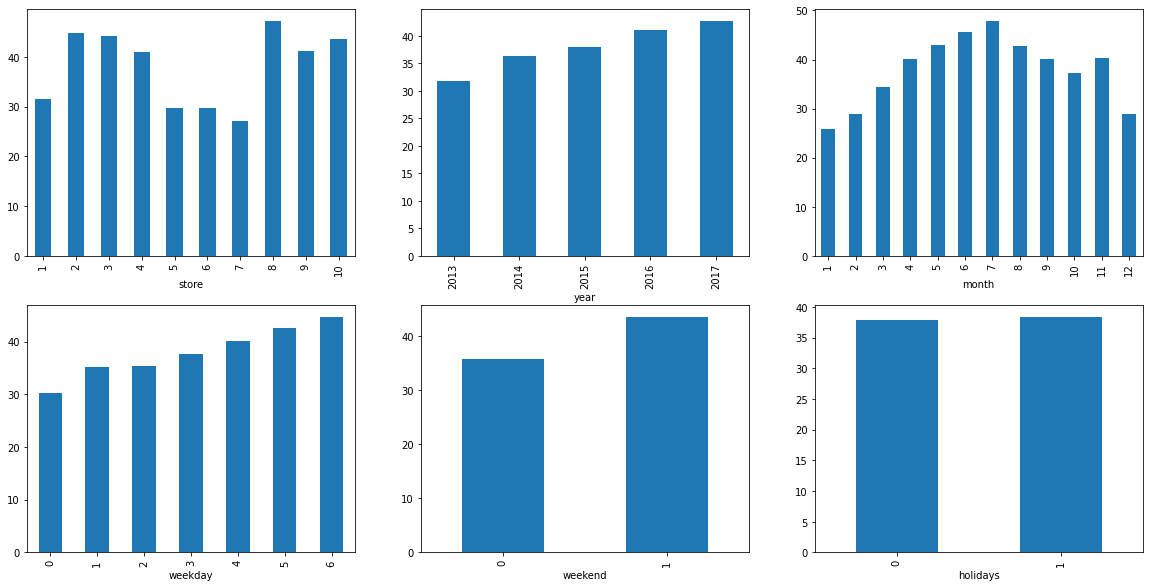

In [37]:
features = ['store', 'year', 'month',\
            'weekday', 'weekend','holidays' ]
plt.subplots(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    
    df.groupby(col).mean()['sales'].plot.bar()

plt.show()


In [38]:
item_i = df[df['item']==3]
item_i

,date,store,item,sales,year,month,day,weekend,holidays,weekday
36520,2013-01-01,1,3,15.0,2013,1,1,0,0,1
36521,2013-01-02,1,3,30.0,2013,1,2,0,0,2
36522,2013-01-03,1,3,14.0,2013,1,3,0,0,3
36523,2013-01-04,1,3,10.0,2013,1,4,0,0,4
36524,2013-01-05,1,3,23.0,2013,1,5,1,0,5
...,...,...,...,...,...,...,...,...,...,...
54775,2017-12-27,10,3,32.0,2017,12,27,0,0,2
54776,2017-12-28,10,3,33.0,2017,12,28,0,0,3
54777,2017-12-29,10,3,39.0,2017,12,29,0,0,4
54778,2017-12-30,10,3,34.0,2017,12,30,1,0,5


In [39]:
k = item_i.groupby(['date','item'])
item_1 = k.agg(sum)
item_1=item_1.reset_index()
j=[]
for i in range(89, len(item_1)):
    b = item_1['date'][0+i] # 0 is the starting date and 0+i is the end date
    j.append(b)
item = item_1.head(1737) # doubt
item['end']=j    # doubt
date_list = df['date'].to_list()
d =[]
for i in range(1737):
     r = item.loc[i, 'end']
     a = date_list.index(r)
     c =item_1.loc[i:a,'sales'].sum()
     d.append(c)
item['total'] = d
item['date'] = pd.to_datetime(item['date'])
item['year'] = item['date'].dt.year
item['month'] = item['date'].dt.month
item['day'] = item['date'].dt.day

<ipython-input-39-bd26a7c7410e>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-39-bd26a7c7410e>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-39-bd26a7c7410e>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-39-bd26a

In [40]:
item

,date,item,store,sales,year,month,day,weekend,holidays,weekday,end,total
0,2013-01-01,3,55,172.0,2013,1,1,0,0,10,2013-03-31,21420.0
1,2013-01-02,3,55,213.0,2013,1,2,0,0,20,2013-04-01,21472.0
2,2013-01-03,3,55,193.0,2013,1,3,0,0,30,2013-04-02,21580.0
3,2013-01-04,3,55,218.0,2013,1,4,0,0,40,2013-04-03,21664.0
4,2013-01-05,3,55,217.0,2013,1,5,10,0,50,2013-04-04,21783.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1732,2017-09-29,3,55,423.0,2017,9,29,0,0,40,2017-12-27,35038.0
1733,2017-09-30,3,55,482.0,2017,9,30,10,10,50,2017-12-28,34913.0
1734,2017-10-01,3,55,457.0,2017,10,1,10,0,60,2017-12-29,34763.0
1735,2017-10-02,3,55,332.0,2017,10,2,0,10,0,2017-12-30,34648.0


Splitting the data into Train and Test

In [41]:
x =  item.loc[:,['year','month','day']].values
y = item.loc[:,'total'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25)

Scaling

In [42]:
from sklearn.preprocessing import StandardScaler ## standrard scaling 
scaler = StandardScaler() #initialise to a variable
scaler.fit(x_train) # we are finding the values of mean and sd from the td
x_train = scaler.transform(x_train) # fit (mean, sd) and then transform the training data
x_test= scaler.transform(x_test) # transform the test data 
     

Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
linear =LinearRegression()
linear.fit(x_train,y_train)
print('score for Linear Regression:',linear.score(x_test,y_test))

score for Linear Regression: 0.5005890078631788


Decision Tree Regressor

In [44]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeRegressor(max_depth=depth)
  dt.fit(x_train,y_train)
  trainAccuracy = r2_score(y_train,dt.predict(x_train))
  dt = DecisionTreeRegressor(max_depth = depth)
  valAccuracy = cross_val_score(dt, x_train, y_train, cv=10, scoring = make_scorer(r2_score))
  print("Depth:",depth,'Train R2:',trainAccuracy,'Val Score:',np.mean(valAccuracy))
dt = DecisionTreeRegressor(max_depth = int(input('max depth value')))
dt.fit(x_train,y_train)
#print('score for Decision Treeregressor:',dt.score(x_test,y_test))

Depth: 1 Train R2: 0.33660087375032766 Val Score: 0.3328317270987423
Depth: 2 Train R2: 0.5504547143493451 Val Score: 0.5061805346676422
Depth: 3 Train R2: 0.7642928417550151 Val Score: 0.7595530771708602
Depth: 4 Train R2: 0.8707055186325584 Val Score: 0.8678273095805558
Depth: 5 Train R2: 0.9382610065253736 Val Score: 0.9355537746539536
Depth: 6 Train R2: 0.967069052720958 Val Score: 0.9643479541421683
Depth: 7 Train R2: 0.9855525547209587 Val Score: 0.9827568424030992
Depth: 8 Train R2: 0.9944677770367548 Val Score: 0.9921792981964515
Depth: 9 Train R2: 0.9976798215548162 Val Score: 0.9953236362713174
Depth: 10 Train R2: 0.9993484753475531 Val Score: 0.997386942054088
Depth: 20 Train R2: 1.0 Val Score: 0.9982243670191032
Depth: 40 Train R2: 1.0 Val Score: 0.9980765521277428
Depth: 60 Train R2: 1.0 Val Score: 0.9980765521277428
max depth value10


DecisionTreeRegressor(max_depth=10)

K Nearest Neighbor Regressor

In [45]:
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i)
  knn.fit(x_train,y_train)
  print('k value:',i ,'train score:',knn.score(x_train,y_train),'cv score:',np.mean(cross_val_score(knn, x_train, y_train, cv=10, scoring = make_scorer(r2_score))))
knn =KNeighborsRegressor(int(input('enter k values:')))
knn.fit(x_train,y_train)
#print('score for knn regression :',knn.score(x_test,y_test))

k value: 1 train score: 1.0 cv score: 0.9934924748348278
k value: 2 train score: 0.9992094302659754 cv score: 0.9908730912393553
k value: 3 train score: 0.9976966355940651 cv score: 0.9860929407996804
k value: 4 train score: 0.994799984087185 cv score: 0.9818530230158375
k value: 5 train score: 0.9907483285420077 cv score: 0.9788876194911037
k value: 6 train score: 0.9876356759065874 cv score: 0.979357084280932
k value: 7 train score: 0.9860964563606373 cv score: 0.9783126895141301
k value: 8 train score: 0.9851973364126032 cv score: 0.9770338367357544
k value: 9 train score: 0.9837574409238883 cv score: 0.9742116048741332
k value: 10 train score: 0.9818024808043688 cv score: 0.972758953661933
k value: 20 train score: 0.9616719858002875 cv score: 0.9515328244630883
k value: 50 train score: 0.9338500304639071 cv score: 0.9202140012291622
enter k values:10


KNeighborsRegressor(n_neighbors=10)

In [48]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


XGBoost

In [56]:
from xgboost import XGBRegressor
import xgboost as xgb

for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr,n_estimators =100,verbosity =0)#initialise the model
  model.fit(x_train,y_train)
  model.score(x_test,y_test)
  print('Learning rate:',lr,"Train score",model.score(x_train,y_train),'Cross-Val score:',np.mean(cross_val_score(model,x_train,y_train,cv=10)))
model = xgb.XGBRegressor(learning_rate = float(input('LR value')),n_estimators =100) 
model.fit(x_train,y_train)

Learning rate: 0.01 Train score -3.454070493744301 Cross-Val score: -3.5306706642565544
Learning rate: 0.02 Train score 0.38285354681874184 Cross-Val score: 0.3694736241288786
Learning rate: 0.03 Train score 0.9116428733115715 Cross-Val score: 0.907381021749992
Learning rate: 0.04 Train score 0.9859899122205422 Cross-Val score: 0.9839328447087888
Learning rate: 0.05 Train score 0.997009808521877 Cross-Val score: 0.9957392604338227
Learning rate: 0.06 Train score 0.998927194004602 Cross-Val score: 0.9978928534783211
Learning rate: 0.07 Train score 0.9994485709345873 Cross-Val score: 0.9984408981918685
Learning rate: 0.08 Train score 0.9995695549374758 Cross-Val score: 0.9987439162009772
Learning rate: 0.09 Train score 0.9996630111012208 Cross-Val score: 0.9989693791344696
Learning rate: 0.1 Train score 0.9997963827105042 Cross-Val score: 0.9990710709787394
Learning rate: 0.11 Train score 0.9998315641036756 Cross-Val score: 0.9992633930915062
Learning rate: 0.12 Train score 0.99985511926

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.7, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [57]:
print('Score for the Linear Regressor       :',linear.score(x_test,y_test))    
print('Score for the Decision TreeRegressor :',dt.score(x_test,y_test))    
print('Score for the KNN Regressor          :',knn.score(x_test,y_test)) 
print('Score for the XGBRegressor           :',model.score(x_test,y_test))

Score for the Linear Regressor       : 0.5005890078631788
Score for the Decision TreeRegressor : 0.9985232132386185
Score for the KNN Regressor          : 0.9802556007116937
Score for the XGBRegressor           : 0.9994047280180485


In [59]:
linear_pred = linear.predict(x_test)
dt_pred= dt.predict(x_test)
knn_pred=knn.predict(x_test)
xgb_pred=model.predict(x_test)

In [60]:
pd.DataFrame({"Actual":y_test, "linear_pred":linear_pred,"dt_pred":dt_pred, "knn_pred":knn_pred,"xgb_pred":xgb_pred })

,Actual,linear_pred,dt_pred,knn_pred,xgb_pred
0,32810.0,29456.928186,33005.333333,32386.0,32689.337891
1,29282.0,32003.975437,29444.000000,29206.3,29245.361328
2,39306.0,35823.046359,39097.400000,39461.8,39281.539062
3,32580.0,30306.618927,32502.500000,32246.5,32645.142578
4,42011.0,37127.694834,42345.363636,41690.2,42197.468750
...,...,...,...,...,...
430,28562.0,27690.197035,28607.500000,28678.3,28780.224609
431,27466.0,31511.292927,27306.000000,27948.1,27554.205078
432,42981.0,36726.811824,42938.173913,42570.1,43037.921875
433,40009.0,34069.590154,40034.894737,39062.5,39938.863281
